<a href="https://colab.research.google.com/github/smileabao/codePractice/blob/master/Tensflow_keras%E6%9E%B6%E8%A8%AD%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 先將tensorflow下載

In [4]:
pip install -q tensorflow==2.0.0

### 將boston資料import到系統中


In [2]:
from sklearn.datasets import load_boston

In [ ]:
Boston=load_boston()
Boston

In [5]:
import pandas as pd

In [6]:
TB=pd.DataFrame(data = Boston.data,columns=Boston.feature_names)

In [ ]:
#這裡還不會有MEDEV
TB.head()

In [8]:
TB['MEDV']=Boston.target

In [ ]:
#這裡就會有MEDV
TB.head()

### 畫圖

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


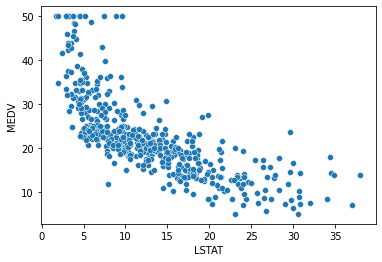

In [12]:
sns.scatterplot(TB['LSTAT'],TB.MEDV)

### 架設網路 Build Simple Linear Regression by Keras

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#建立一個次序的網路
LR=keras.Sequential(name='Linear Regression')
#建立網路,input_shpae(1,) 1=>代表一層網路 
#             逗點後代表不知道會有幾個參數進來
LR.add(layers.Dense(1,input_shape=(1,)))
LR.summary()

In [ ]:
keras.utils.plot_model(LR)

### 開始訓練網路 Train the Model

In [20]:
#給兩個參數訓練方式 和 Loss Function
LR.compile(keras.optimizers.Adam(0.01),
           loss=keras.losses.MeanSquaredError())

In [ ]:
LR.fit(TB.LSTAT,TB.MEDV,epochs=1000)

In [24]:
LR.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.9498782]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([34.54514], dtype=float32)>]

### Prediction (預測開始)

In [25]:
myPre=LR.predict(TB.LSTAT)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


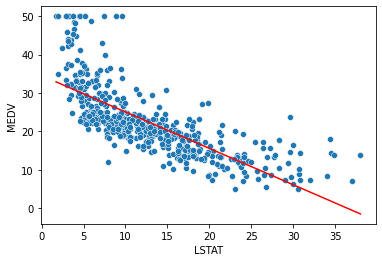

In [27]:
sns.scatterplot(TB.LSTAT,TB.MEDV)
sns.lineplot(TB.LSTAT,myPre[:,0],color='red')